In [ ]:
# Description: This program uses the Moving Average Covergence/Divergence (MACD) crossover 
#              to determine when to buy and sell stock

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [12]:
#Load the data
df = pd.read_csv('Fortis.csv')
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Volume
2020-01-02 15:30:00,1/2/2020 15:30:00,133.45,136.35,132.55,134.15,637088
2020-01-03 15:30:00,1/3/2020 15:30:00,133.60,136.00,133.40,135.05,659414
2020-01-06 15:30:00,1/6/2020 15:30:00,134.25,134.65,132.15,133.05,480400
2020-01-07 15:30:00,1/7/2020 15:30:00,133.40,135.05,131.35,133.05,500000
2020-01-08 15:30:00,1/8/2020 15:30:00,132.50,136.00,131.30,133.60,6238333
...,...,...,...,...,...,...
2021-05-25 15:30:00,5/25/2021 15:30:00,228.20,233.30,223.70,225.65,2868626
2021-05-26 15:30:00,5/26/2021 15:30:00,226.80,228.75,224.50,227.25,1618623
2021-05-27 15:30:00,5/27/2021 15:30:00,228.85,228.90,224.55,226.25,2221623
2021-05-28 15:30:00,5/28/2021 15:30:00,227.55,235.00,225.65,230.10,5646216


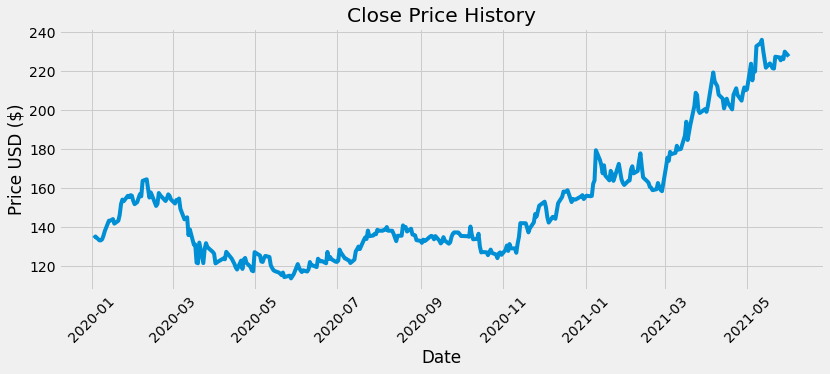

In [14]:
#Visually Show stock price
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.show()

In [15]:
#Calculate the MACD and signal line indicators
# Calculate the short term exponential moving average (EMA)
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()
# Calculate the long term exponential moving average (EMA)
LongEMA = df.Close.ewm(span=26, adjust=False).mean()

#Calculate the MACD line
MACD = ShortEMA - LongEMA

# Signal line 
signal = MACD.ewm(span=9, adjust=False).mean()

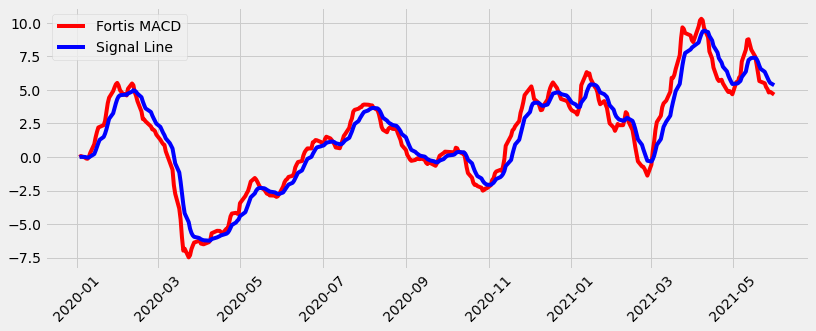

In [16]:
# Plot the chart
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, MACD, label = 'Fortis MACD', color= 'red')
plt.plot(df.index, signal, label= 'Signal Line', color= 'blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [18]:
#Create new columns for the data
df['MACD'] = MACD
df['Signal Line'] = signal
df

,Date,Open,High,Low,Close,Volume,MACD,Signal Line
2020-01-02 15:30:00,1/2/2020 15:30:00,133.45,136.35,132.55,134.15,637088,0.000000,0.000000
2020-01-03 15:30:00,1/3/2020 15:30:00,133.60,136.00,133.40,135.05,659414,0.071795,0.014359
2020-01-06 15:30:00,1/6/2020 15:30:00,134.25,134.65,132.15,133.05,480400,-0.032318,0.005024
2020-01-07 15:30:00,1/7/2020 15:30:00,133.40,135.05,131.35,133.05,500000,-0.113519,-0.018685
2020-01-08 15:30:00,1/8/2020 15:30:00,132.50,136.00,131.30,133.60,6238333,-0.131971,-0.041342
...,...,...,...,...,...,...,...,...
2021-05-25 15:30:00,5/25/2021 15:30:00,228.20,233.30,223.70,225.65,2868626,5.215431,6.124104
2021-05-26 15:30:00,5/26/2021 15:30:00,226.80,228.75,224.50,227.25,1618623,5.064999,5.912283
2021-05-27 15:30:00,5/27/2021 15:30:00,228.85,228.90,224.55,226.25,2221623,4.809647,5.691756
2021-05-28 15:30:00,5/28/2021 15:30:00,227.55,235.00,225.65,230.10,5646216,4.861896,5.525784


In [19]:
# Create Function to signal when to buy or sell
def buy_sell(signal):
    Buy = []
    Sell = []
    flag = -1
    
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:
            Sell.append(np.nan)
            if flag != 1:
                Buy.append(signal['Close'][i])
                flag = 1
            else:
                Buy.append(np.nan)
        elif signal['MACD'][i] < signal['Signal Line'][i]:
            Buy.append(np.nan)
            if flag != 0:
                Sell.append(signal['Close'][i])
                flag = 0
            else:
                Sell.append(np.nan)
        else:
            Buy.append(np.nan)
            Sell.append(np.nan)
    return (Buy, Sell)

In [20]:
#Create Buy and Sell Column
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]
df

,Date,Open,High,Low,Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2020-01-02 15:30:00,1/2/2020 15:30:00,133.45,136.35,132.55,134.15,637088,0.000000,0.000000,NaN,NaN
2020-01-03 15:30:00,1/3/2020 15:30:00,133.60,136.00,133.40,135.05,659414,0.071795,0.014359,135.05,NaN
2020-01-06 15:30:00,1/6/2020 15:30:00,134.25,134.65,132.15,133.05,480400,-0.032318,0.005024,NaN,133.05
2020-01-07 15:30:00,1/7/2020 15:30:00,133.40,135.05,131.35,133.05,500000,-0.113519,-0.018685,NaN,NaN
2020-01-08 15:30:00,1/8/2020 15:30:00,132.50,136.00,131.30,133.60,6238333,-0.131971,-0.041342,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-05-25 15:30:00,5/25/2021 15:30:00,228.20,233.30,223.70,225.65,2868626,5.215431,6.124104,NaN,NaN
2021-05-26 15:30:00,5/26/2021 15:30:00,226.80,228.75,224.50,227.25,1618623,5.064999,5.912283,NaN,NaN
2021-05-27 15:30:00,5/27/2021 15:30:00,228.85,228.90,224.55,226.25,2221623,4.809647,5.691756,NaN,NaN
2021-05-28 15:30:00,5/28/2021 15:30:00,227.55,235.00,225.65,230.10,5646216,4.861896,5.525784,NaN,NaN


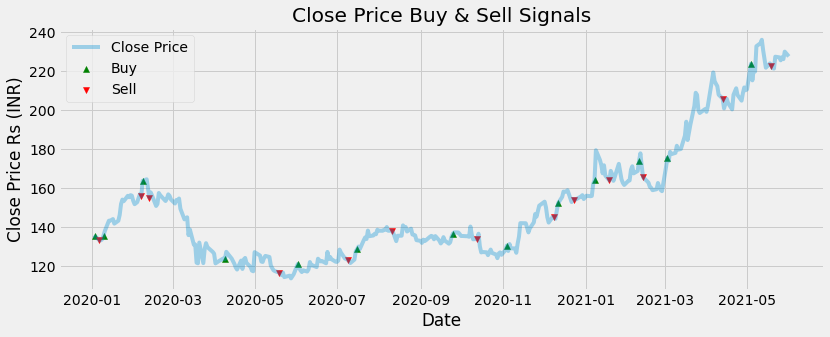

In [22]:
#Visually Show Buy and Sell
plt.figure(figsize=(12.2, 4.5))
plt.scatter(df.index, df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha =1)
plt.scatter(df.index, df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha =1)
plt.plot(df['Close'], label='Close Price', alpha=0.35)
plt.title('Close Price Buy & Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price Rs (INR)')
plt.legend(loc = 'upper left')
plt.show()